# Introduction to Optimization in Data Science

Optimization is a core component of data science, where the goal is to improve the performance of models and algorithms by finding the best parameters or configurations. Optimization helps in enhancing the accuracy, efficiency, and effectiveness of various data science tasks.

## Key Areas of Optimization in Data Science

### 1. Machine Learning Model Training
In machine learning, optimization is used to minimize the loss function, which measures the difference between the predicted and actual values. By optimizing the loss function, we improve the model's accuracy.

- **Loss Functions**: Common loss functions include Mean Squared Error (MSE) for regression tasks and Cross-Entropy Loss for classification tasks.
- **Algorithms**: 
  - **Gradient Descent**: Iteratively adjusts the model parameters to minimize the loss function.
  - **Stochastic Gradient Descent (SGD)**: A variant of Gradient Descent that updates parameters using a single data point or a mini-batch, making it more scalable for large datasets.

### 2. Feature Selection
Feature selection involves selecting the most relevant features for building a predictive model. Optimization techniques help in identifying the best subset of features that contribute the most to the model's performance.

- **Techniques**:
  - **Recursive Feature Elimination (RFE)**: Iteratively removes the least important features based on the model's performance.
  - **Lasso Regression**: Uses L1 regularization to shrink less important feature coefficients to zero, effectively selecting a subset of features.

### 3. Hyperparameter Tuning
Hyperparameters are parameters that are set before the learning process begins and cannot be learned from the data. Optimization methods are used to find the best hyperparameters that yield the best model performance.

- **Methods**:
  - **Grid Search**: Exhaustively searches through a specified subset of hyperparameters.
  - **Random Search**: Samples random combinations of hyperparameters.
  - **Bayesian Optimization**: Uses a probabilistic model to select the most promising hyperparameters.

### 4. Clustering and Classification
Optimization is used to improve clustering and classification algorithms by minimizing within-cluster variance or classification error.

- **Algorithms**:
  - **K-means Clustering**: Partitions data into clusters by minimizing the sum of squared distances between data points and the cluster centroids.
  - **Support Vector Machines (SVM)**: Finds the hyperplane that maximizes the margin between different classes by solving a convex optimization problem.

### 5. Reinforcement Learning
In reinforcement learning, optimization is used to maximize the cumulative reward by finding the best policy for an agent to follow in a given environment.

- **Techniques**:
  - **Q-Learning**: Learns the optimal policy by optimizing the Q-values, which estimate the expected utility of taking a given action in a given state.
  - **Policy Gradient Methods**: Directly optimize the policy by computing gradients of the expected reward with respect to the policy parameters.

### 6. Optimization in Neural Networks
Training neural networks involves optimizing the weights and biases to minimize the error between the predicted and actual outputs.

- **Backpropagation**: An algorithm used to compute gradients of the loss function with respect to each weight by applying the chain rule.
- **Regularization**: Techniques such as L1 and L2 regularization add a penalty term to the loss function to prevent overfitting by discouraging overly complex models.


# Gradient Descent

**Gradient Descent** is an iterative optimization algorithm used to minimize a function by moving in the direction of the steepest descent as defined by the negative of the gradient. It is widely used in machine learning for optimizing the loss function of models.

## Mathematical Formulation

Let  $J(\theta)$  be the cost function that we want to minimize, where  $\theta$ represents the parameters of the model. The gradient descent algorithm updates the parameters iteratively using the following rule:

$$
\theta_{t+1} = \theta_t - \alpha \nabla_\theta J(\theta_t)
$$

where:
- $\theta_t$ is the parameter vector at iteration $t $.
- $ \alpha$ is the learning rate, which determines the size of the steps we take to reach a minimum.
- $ \nabla_\theta J(\theta_t) $ is the gradient of the cost function with respect to the parameters.

## Steps of Gradient Descent

1. **Initialize** the parameters $ \theta $ with some initial values.
2. **Compute** the gradient of the cost function with respect to the parameters.
3. **Update** the parameters using the update rule.
4. **Repeat** steps 2 and 3 until the parameters converge to the minimum or the maximum number of iterations is reached.

## Visualizing Gradient Descent

Let's visualize Gradient Descent in both two-dimensional and three-dimensional cases.






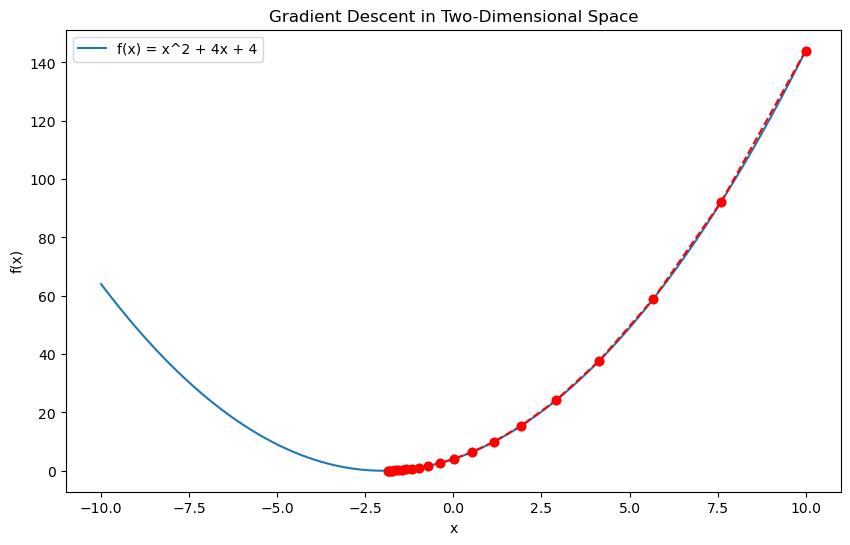

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize
def f(x):
    return x**2 + 4*x + 4

# Gradient of the function
def df(x):
    return 2*x + 4

# Gradient Descent Algorithm
def gradient_descent(start, learning_rate, iterations):
    x = start
    history = [x]
    for _ in range(iterations):
        x = x - learning_rate * df(x)
        history.append(x)
    return history

# Parameters
start = 10
learning_rate = 0.1
iterations = 20

# Run Gradient Descent
history = gradient_descent(start, learning_rate, iterations)

# Visualization
x_vals = np.linspace(-10, 10, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 + 4x + 4')
plt.scatter(history, [f(x) for x in history], color='red')
plt.plot(history, [f(x) for x in history], color='red', linestyle='--', marker='o')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent in Two-Dimensional Space')
plt.legend()
plt.show()


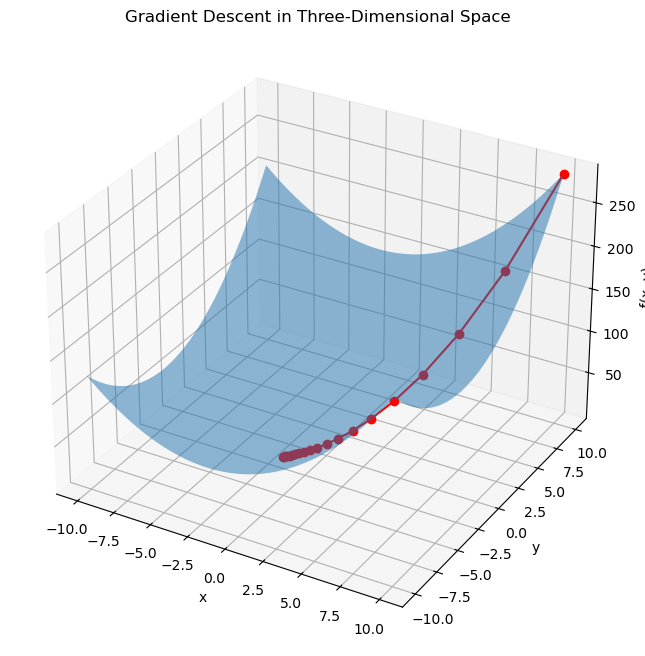

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Function to minimize
def f_3d(x, y):
    return x**2 + y**2 + 4*x + 4*y + 8

# Gradient of the function
def df_3d(x, y):
    return np.array([2*x + 4, 2*y + 4])

# Gradient Descent Algorithm
def gradient_descent_3d(start, learning_rate, iterations):
    x, y = start
    history = [(x, y)]
    for _ in range(iterations):
        grad = df_3d(x, y)
        x, y = x - learning_rate * grad[0], y - learning_rate * grad[1]
        history.append((x, y))
    return history

# Parameters
start = (10, 10)
learning_rate = 0.1
iterations = 20

# Run Gradient Descent
history_3d = gradient_descent_3d(start, learning_rate, iterations)

# Visualization
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_3d(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)
history_array = np.array(history_3d)
ax.plot(history_array[:, 0], history_array[:, 1], f_3d(history_array[:, 0], history_array[:, 1]), color='red', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent in Three-Dimensional Space')
plt.show()


### Gradient Descent Visualization for Linear Regression

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add the bias term (x0 = 1) to each instance
X_b = np.c_[np.ones((100, 1)), X]

# Learning rate and iterations
learning_rate = 0.1
iterations = 1000

# Initialize weights
theta = np.random.randn(2, 1)

In [52]:
# Gradient Descent Algorithm for Linear Regression
def gradient_descent_lin_reg(X, y, theta, learning_rate, iterations):
    m = len(y)
    history = [theta.copy()]
    for _ in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        history.append(theta.copy())
    return theta, history

In [53]:
# Run Gradient Descent
theta_optimal, history = gradient_descent_lin_reg(X_b, y, theta, learning_rate, iterations)

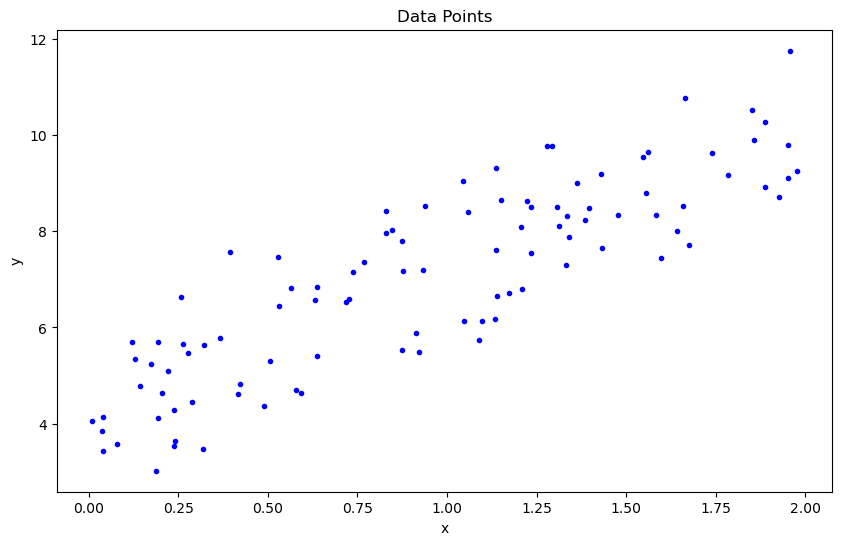

In [54]:
# Visualize the data points
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points')
plt.show()

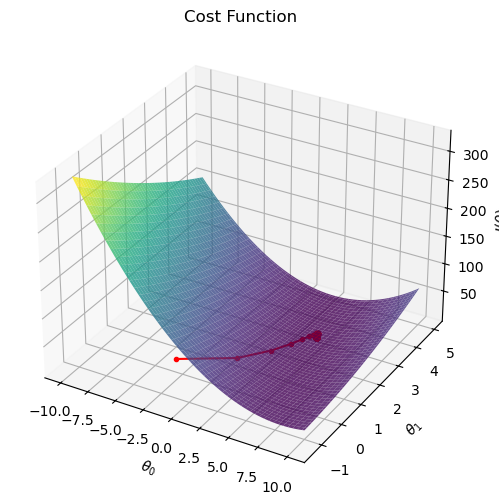

In [55]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 5, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = np.sum((X_b.dot(t) - y) ** 2) / len(y)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, cmap='viridis', alpha=0.8)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
ax.set_title('Cost Function')

# Add gradient descent steps
history_array = np.array(history).squeeze()
cost_history = np.array([np.sum((X_b.dot(t) - y) ** 2) / len(y) for t in history])
ax.plot(history_array[:, 0], history_array[:, 1], cost_history, 'r.-')
plt.show()

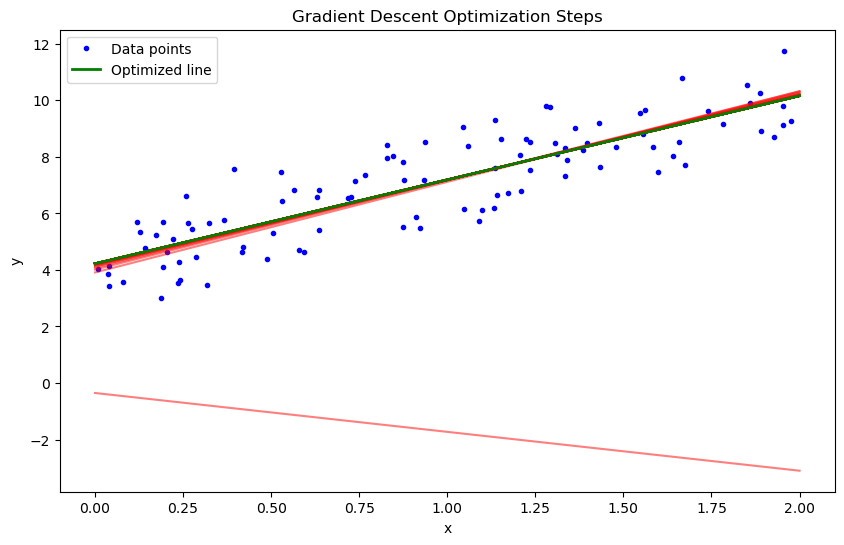

In [56]:
# Visualize the steps of the optimization
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Data points')
x_vals = np.array([0, 2])
for i in range(0, len(history), max(1, len(history) // 100)):  # Plot every 1% of the steps
    theta = history[i]
    y_vals = theta[0] + theta[1] * x_vals
    if i > 0:  # Exclude Step 0 from the legend
        plt.plot(x_vals, y_vals, 'r-', alpha=0.5, label=f'Step {i}' if i == 1 else "")
    else:
        plt.plot(x_vals, y_vals, 'r-', alpha=0.5)
plt.plot(x_vals, theta_optimal[0] + theta_optimal[1] * x_vals, 'g-', linewidth=2, label='Optimized line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization Steps')
plt.legend()
plt.show()

## Logistic Regression with Gradient Descent

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data for binary classification
np.random.seed(0)
num_samples = 100

X1 = np.random.multivariate_normal([2, 2], [[1, 0.75], [0.75, 1]], num_samples // 2)
X2 = np.random.multivariate_normal([0, -2], [[1, 0.75], [0.75, 1]], num_samples // 2)

X = np.vstack((X1, X2))
y = np.hstack((np.ones(num_samples // 2), np.zeros(num_samples // 2)))

# Add the bias term (x0 = 1) to each instance
X_b = np.c_[np.ones((num_samples, 1)), X]


In [58]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5  # To prevent log(0)
    cost = -1/m * (y.dot(np.log(h + epsilon)) + (1 - y).dot(np.log(1 - h + epsilon)))
    return cost

# Gradient of the cost function
def gradient(theta, X, y):
    m = len(y)
    return 1/m * X.T.dot(sigmoid(X.dot(theta)) - y)

# Gradient Descent Algorithm for Logistic Regression
def gradient_descent_log_reg(X, y, theta, learning_rate, iterations):
    history = [theta.copy()]
    for _ in range(iterations):
        theta = theta - learning_rate * gradient(theta, X, y)
        history.append(theta.copy())
    return theta, history

In [59]:
# Initialize weights
theta = np.zeros(X_b.shape[1])

# Parameters
learning_rate = 0.1
iterations = 1000

# Run Gradient Descent
theta_optimal, history = gradient_descent_log_reg(X_b, y, theta, learning_rate, iterations)

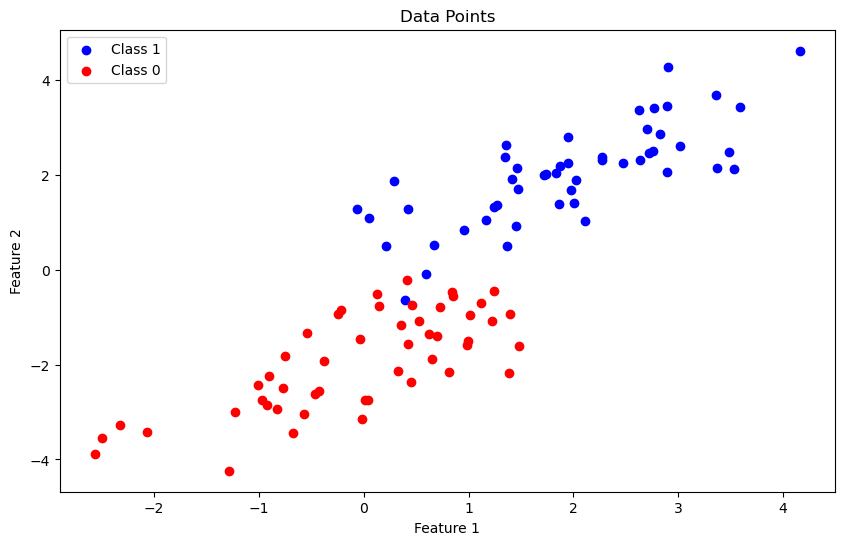

In [60]:
# Visualize the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='b', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')
plt.legend()
plt.show()

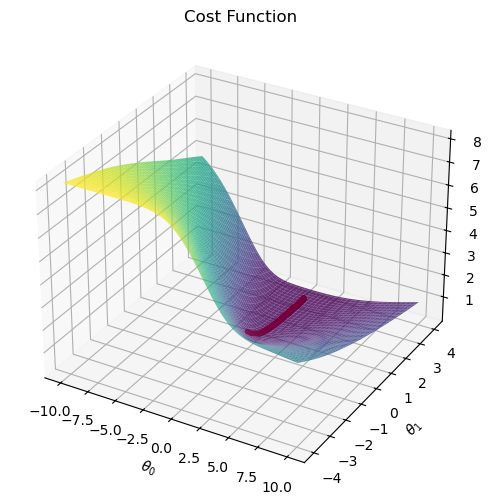

In [61]:
# Visualize the cost function
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-4, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta[0], theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = cost_function(t, X_b, y)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals.T, cmap='viridis', alpha=0.8)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
ax.set_title('Cost Function')

# Add gradient descent steps
history_array = np.array(history)
cost_history = np.array([cost_function(t, X_b, y) for t in history])
ax.plot(history_array[:, 1], history_array[:, 2], cost_history, 'r.-')
plt.show()

/var/folders/40/7bxxvd3x4pj5vxgyywf02b6c0000gn/T/ipykernel_7897/472326848.py:10: RuntimeWarning: invalid value encountered in divide
  y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]


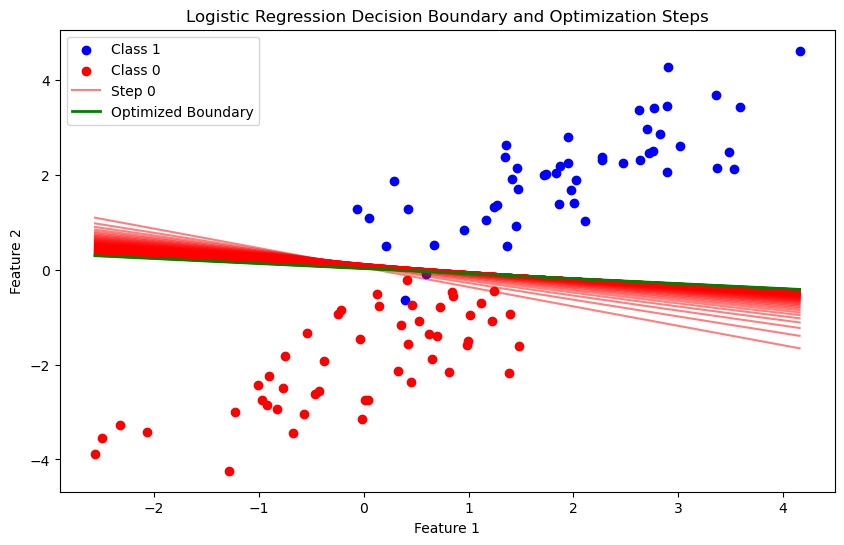

In [62]:
# Visualize the decision boundary and optimization steps
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='b', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Class 0')

for i in range(0, len(history), max(1, len(history) // 100)):  # Plot every 1% of the steps
    theta = history[i]
    y_vals = -(theta[0] + theta[1] * x_vals) / theta[2]
    plt.plot(x_vals, y_vals, 'r-', alpha=0.5, label=f'Step {i}' if i == 0 else "")

y_vals_optimal = -(theta_optimal[0] + theta_optimal[1] * x_vals) / theta_optimal[2]
plt.plot(x_vals, y_vals_optimal, 'g-', linewidth=2, label='Optimized Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary and Optimization Steps')
plt.legend()
plt.show()


#  Stochastic Gradient Descent (SGD)



**Stochastic Gradient Descent (SGD)** is a variant of Gradient Descent where the model parameters are updated using a single data point at each iteration instead of the entire dataset. This makes SGD faster and more suitable for large datasets.

- **Update Rule**: The update rule for SGD is given by:
  $$
  \theta_{t+1} = \theta_t - \alpha \nabla_\theta J(\theta_t; x_i, y_i)
  $$
  where  ($x_i, y_i$)  is a single training example.

- **Advantages**:
  - Faster convergence for large datasets.
  - Can escape local minima due to its stochastic nature.

- **Disadvantages**:
  - More noisy updates compared to batch Gradient Descent.
  - May require more iterations to converge.


## Mathematical Formulation

For a given training example   ($x_i, y_i$), the gradient of the loss function with respect to the parameters $ \theta $ is calculated as:
$$
\nabla_\theta J(\theta; x_i, y_i) = \frac{\partial J(\theta; x_i, y_i)}{\partial \theta}
$$

The parameters are then updated using the following rule:
$$
\theta_{t+1} = \theta_t - \alpha \nabla_\theta J(\theta_t; x_i, y_i)
$$


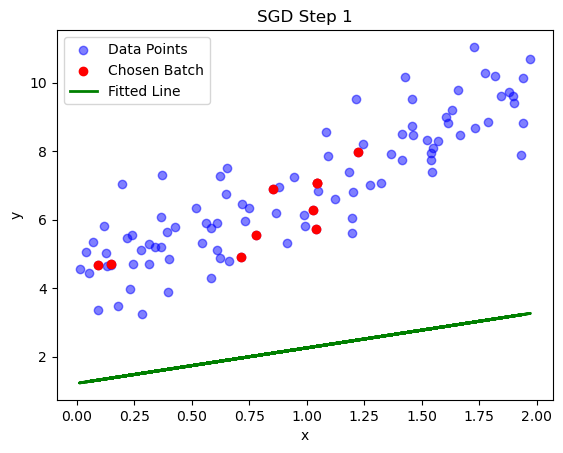

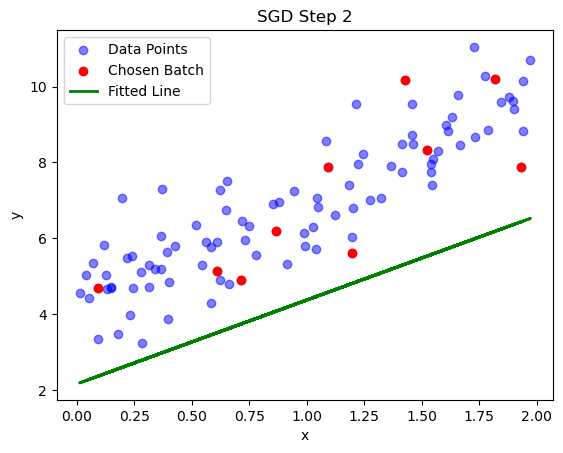

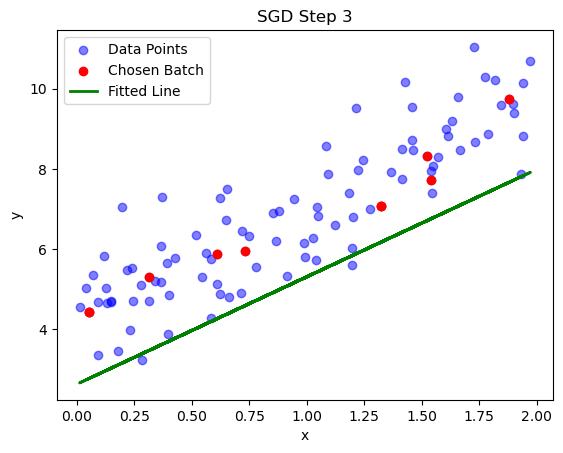

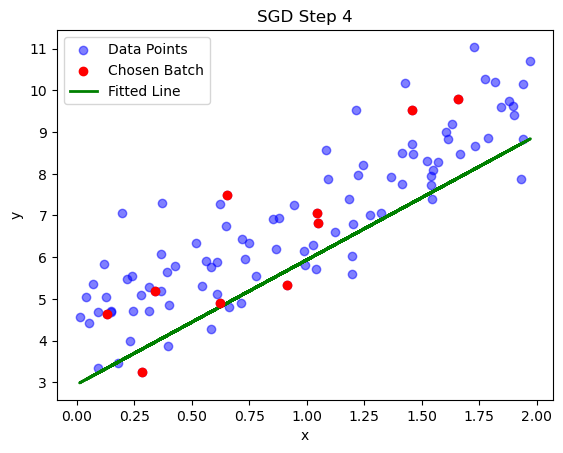

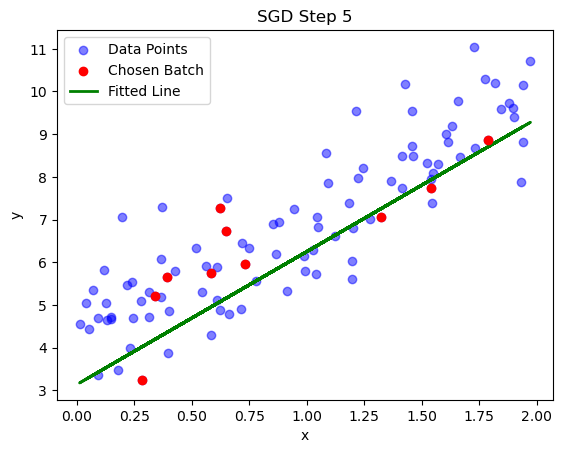

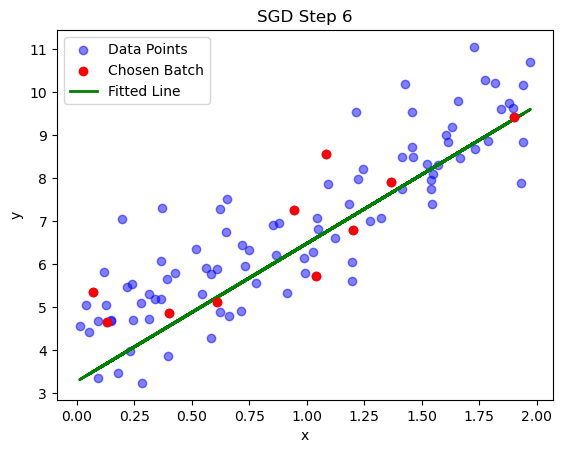

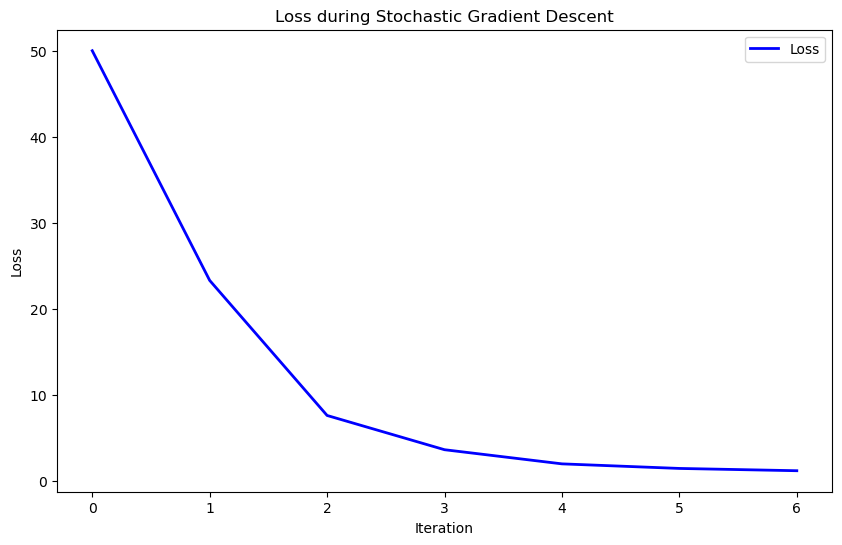

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Define the linear function and its gradient
def linear_function(w, x):
    return w[0] + w[1] * x

def grad_linear_function(w, x, y):
    y_pred = linear_function(w, x)
    error = y_pred - y
    return np.array([2 * np.mean(error), 2 * np.mean(error * x)])

# Stochastic Gradient Descent
def sgd(X, y, w_start, learning_rate, iterations, batch_size):
    w = np.copy(w_start)
    path = [w.copy()]
    for i in range(iterations):
        indices = np.random.randint(len(X), size=batch_size)
        x_batch = X[indices]
        y_batch = y[indices]
        gradient = grad_linear_function(w, x_batch, y_batch)
        w -= learning_rate * gradient
        path.append(w.copy())
        # Plot the chosen observation
        plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
        plt.scatter(x_batch, y_batch, color='red', zorder=5, label='Chosen Batch')
        plt.plot(X, linear_function(w, X), color='green', linewidth=2, label='Fitted Line')
        plt.title(f'SGD Step {i+1}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    return path

# Parameters
w_start = np.array([0.0, 0.0])  # Starting point
learning_rate = 0.1
iterations = 6
batch_size = 10

# Run SGD
path = sgd(X, y, w_start, learning_rate, iterations, batch_size)

# Plotting the loss over iterations
loss_history = [np.mean((linear_function(w, X) - y) ** 2) for w in path]
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_history)), loss_history, 'b-', linewidth=2, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss during Stochastic Gradient Descent')
plt.legend()
plt.show()


# Genetic Algorithms 


Genetic Algorithms (GAs) are a class of optimization algorithms inspired by the process of natural selection. They are used to find approximate solutions to optimization and search problems by evolving a population of candidate solutions. In the context of Machine Learning, Genetic Algorithms can be used for tasks such as hyperparameter tuning, feature selection, and optimizing complex objective functions.

### Key Concepts in Genetic Algorithms

1. **Population**: A set of potential solutions to the problem.
2. **Chromosome**: A representation of a solution, typically encoded as a string or array.
3. **Gene**: A part of the chromosome representing a particular aspect of the solution.
4. **Fitness Function**: A function that evaluates how good a solution is (i.e., how "fit" it is).
5. **Selection**: The process of choosing the fittest individuals from the population to create offspring.
6. **Crossover (Recombination)**: A genetic operator that combines two parent chromosomes to produce offspring.
7. **Mutation**: A genetic operator that introduces random changes to an offspring chromosome.
8. **Generation**: A single iteration of the algorithm, consisting of selection, crossover, and mutation.


### Steps of a Genetic Algorithm

1. **Initialization**: Generate an initial population of chromosomes randomly.
2. **Selection**: Evaluate the fitness of each chromosome and select the fittest individuals for reproduction.
3. **Crossover**: Perform crossover between pairs of selected individuals to produce new offspring.
4. **Mutation**: Apply mutation to the offspring with a certain probability.
5. **Replacement**: Replace the least fit individuals in the population with the new offspring.
6. **Termination**: Repeat steps 2-5 until a stopping criterion is met (e.g., a certain number of generations or a satisfactory fitness level).



### Applications of Genetic Algorithms in Machine Learning

1. **Hyperparameter Tuning**: Genetic Algorithms can be used to find the optimal set of hyperparameters for machine learning models. Instead of manually searching for the best hyperparameters, GAs can automate this process by evolving a population of hyperparameter sets.

2. **Feature Selection**: GAs can help in selecting the most relevant features for a machine learning model. By evolving different subsets of features, GAs can identify the combination that yields the best model performance.

3. **Optimization of Complex Functions**: In cases where the objective function is complex and non-differentiable, GAs can be an effective optimization tool. For example, in reinforcement learning, GAs can optimize policies directly when gradient-based methods are not applicable.



### Pseudocode for a Genetic Algorithm

**Pseudocode for Genetic Algorithm**

1. Initialize population P with N individuals
2. Evaluate the fitness of each individual in P
3. Repeat until termination criterion is met:
   a. Select parents from P based on fitness
   b. Perform crossover to create offspring
   c. Perform mutation on offspring
   d. Evaluate the fitness of offspring
   e. Replace least fit individuals in P with offspring


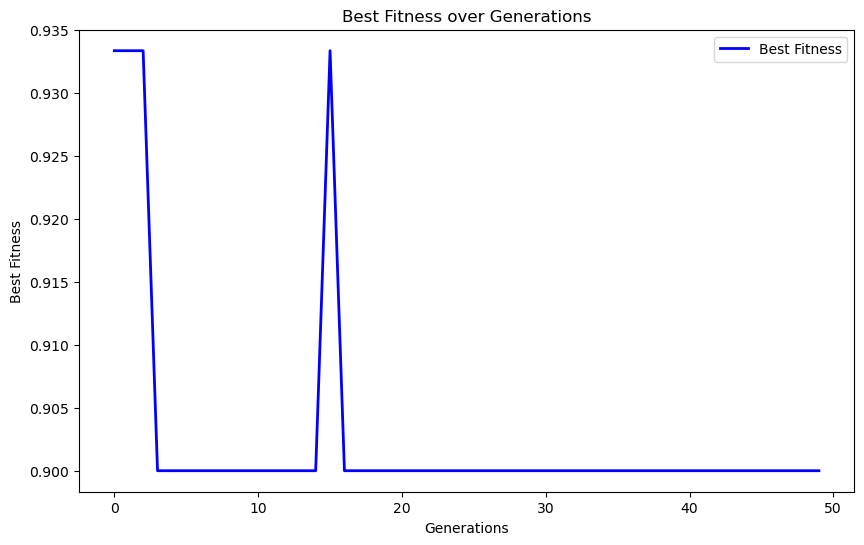

Best hyperparameters found:
n_estimators: 123
max_depth: 17


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=482)

# Define the fitness function
def fitness(chromosome):
    n_estimators = int(chromosome[0])
    max_depth = int(chromosome[1])
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return accuracy_score(y_test, predictions)

# Generate initial population
def generate_population(size, bounds):
    population = np.random.rand(size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]
    return np.round(population).astype(int)  # Ensure population values are integers

# Selection (Tournament Selection)
def selection(population, fitness_values):
    selected = []
    for _ in range(len(population)):
        i, j = np.random.randint(0, len(population), 2)
        if fitness_values[i] > fitness_values[j]:
            selected.append(population[i])
        else:
            selected.append(population[j])
    return np.array(selected)

# Crossover (Single-point Crossover)
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(parent1) )
        return np.concatenate([parent1[:point], parent2[point:]]), np.concatenate([parent2[:point], parent1[point:]])
    else:
        return parent1, parent2

# Mutation (Random Mutation)
def mutate(chromosome, bounds):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = bounds[i, 0] + np.random.rand() * (bounds[i, 1] - bounds[i, 0])
    return np.round(chromosome).astype(int)  # Ensure mutated values are integers

# Parameters
population_size = 20
chromosome_length = 2  # n_estimators and max_depth
crossover_rate = 0.7
mutation_rate = 0.1
generations = 50
bounds = np.array([[10, 200], [1, 20]])  # Bounds for n_estimators and max_depth

# Run the Genetic Algorithm
def genetic_algorithm():
    population = generate_population(population_size, bounds)
    best_fitness = []
    
    for generation in range(generations):
        fitness_values = np.array([fitness(individual) for individual in population])
        best_fitness.append(np.max(fitness_values))
        
        selected_population = selection(population, fitness_values)
        next_population = []
        
        for i in range(0, population_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i + 1]
            offspring1, offspring2 = crossover(parent1, parent2)
            next_population.append(mutate(offspring1, bounds))
            next_population.append(mutate(offspring2, bounds))
        
        population = np.array(next_population)
       
    return best_fitness, population[np.argmax(fitness_values)]

# Run the Genetic Algorithm and plot the results
best_fitness, best_individual = genetic_algorithm()

# Plotting the best fitness over generations
plt.figure(figsize=(10, 6))
plt.plot(best_fitness, 'b-', linewidth=2, label='Best Fitness')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.title('Best Fitness over Generations')
plt.legend()
plt.show()

print("Best hyperparameters found:")
print("n_estimators:", best_individual[0])
print("max_depth:", best_individual[1])


# Particle Swarm Optimization 


Particle Swarm Optimization (PSO) is a population-based optimization technique inspired by the social behavior of birds flocking or fish schooling. It is used to find optimal solutions by having a group of particles (potential solutions) move around the search space according to simple mathematical rules derived from their own best position and the best positions of their neighbors.


### Key Concepts in Particle Swarm Optimization

1. **Particle**: A potential solution in the search space.
2. **Swarm**: A group of particles.
3. **Position**: The current location of a particle in the search space.
4. **Velocity**: The rate of change of the particle's position.
5. **Personal Best (pBest)**: The best position a particle has visited.
6. **Global Best (gBest)**: The best position visited by any particle in the swarm.
7. **Fitness Function**: A function that evaluates how good a solution (particle) is.



### Steps of Particle Swarm Optimization

1. **Initialization**: Initialize a swarm of particles with random positions and velocities.
2. **Evaluation**: Evaluate the fitness of each particle.
3. **Update Personal and Global Bests**: Update the personal best for each particle and the global best for the swarm.
4. **Velocity and Position Update**: Update the velocity and position of each particle based on its personal best and the global best.
5. **Termination**: Repeat steps 2-4 until a stopping criterion is met (e.g., a certain number of iterations or a satisfactory fitness level).


### PSO in Data Science

Particle Swarm Optimization can be applied to various tasks in data science, including:

1. **Hyperparameter Tuning**: PSO can optimize hyperparameters for machine learning models by exploring different combinations and finding the best set.
2. **Feature Selection**: PSO can be used to select the most relevant features for building predictive models.
3. **Clustering**: PSO can optimize the clustering of data points by finding the best cluster centers.
4. **Optimization of Complex Functions**: PSO is effective for optimizing non-convex and complex functions where traditional gradient-based methods may fail.



### Pseudocode for Particle Swarm Optimization


**Pseudocode for Particle Swarm Optimization**

1. Initialize swarm S with N particles
2. For each particle in S:
   a. Initialize position and velocity randomly
   b. Initialize pBest with the current position
3. Initialize gBest with the best pBest value in S
4. Repeat until termination criterion is met:
   a. For each particle in S:
      i. Evaluate the fitness of the particle
      ii. If the current fitness is better than pBest, update pBest
      iii. If the current pBest is better than gBest, update gBest
      iv. Update the particle's velocity
      v. Update the particle's position


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features (30-dimensional)
y = data.target  # Target (0: malignant, 1: benign)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the fitness function
def fitness(position):
    """
    Evaluate the accuracy of a RandomForestClassifier using the selected features.

    Parameters:
    - position: A binary array where each element represents whether a feature is selected (1) or not (0).

    Returns:
    - accuracy: The accuracy of the classifier on the test set.
    """
    selected_features = np.where(position == 1)[0]
    if len(selected_features) == 0:  # Avoid division by zero
        return 0
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    return accuracy_score(y_test, predictions)

# PSO parameters
num_particles = 30
num_dimensions = X.shape[1]  # Number of features
max_iterations = 30
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive (personal) coefficient
c2 = 1.5  # Social (global) coefficient

# Initialize particles
np.random.seed(42)
particles_position = np.random.randint(2, size=(num_particles, num_dimensions))
particles_velocity = np.random.rand(num_particles, num_dimensions) - 0.5
p_best_position = particles_position.copy()
p_best_fitness = np.array([fitness(p) for p in particles_position])
g_best_position = p_best_position[np.argmax(p_best_fitness)]
g_best_fitness = np.max(p_best_fitness)

# PSO main loop
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Evaluate the fitness of the particle
        fitness_value = fitness(particles_position[i])

        # Update personal best
        if fitness_value > p_best_fitness[i]:
            p_best_fitness[i] = fitness_value
            p_best_position[i] = particles_position[i]

        # Update global best
        if fitness_value > g_best_fitness:
            g_best_fitness = fitness_value
            g_best_position = particles_position[i]

    # Update velocity and position
    for i in range(num_particles):
        r1, r2 = np.random.rand(2)
        particles_velocity[i] = (
            w * particles_velocity[i]
            + c1 * r1 * (p_best_position[i] - particles_position[i])
            + c2 * r2 * (g_best_position - particles_position[i])
        )
        particles_position[i] = particles_position[i] + particles_velocity[i]
        particles_position[i] = np.where(particles_position[i] >= 0.5, 1, 0)  # Binary threshold

    print(f"Iteration {iteration + 1}/{max_iterations}, Best Fitness: {g_best_fitness}")

# Final best features
selected_features = np.where(g_best_position == 1)[0]
print(f"Selected features: {selected_features}")
print(f"Best fitness: {g_best_fitness}")


Iteration 1/30, Best Fitness: 0.9912280701754386
Iteration 2/30, Best Fitness: 0.9912280701754386
Iteration 3/30, Best Fitness: 0.9912280701754386
Iteration 4/30, Best Fitness: 0.9912280701754386
Iteration 5/30, Best Fitness: 0.9912280701754386
Iteration 6/30, Best Fitness: 0.9912280701754386
Iteration 7/30, Best Fitness: 0.9912280701754386
Iteration 8/30, Best Fitness: 0.9912280701754386
Iteration 9/30, Best Fitness: 0.9912280701754386
Iteration 10/30, Best Fitness: 0.9912280701754386
Iteration 11/30, Best Fitness: 0.9912280701754386
Iteration 12/30, Best Fitness: 0.9912280701754386
Iteration 13/30, Best Fitness: 0.9912280701754386
Iteration 14/30, Best Fitness: 0.9912280701754386
Iteration 15/30, Best Fitness: 0.9912280701754386
Iteration 16/30, Best Fitness: 0.9912280701754386
Iteration 17/30, Best Fitness: 0.9912280701754386
Iteration 18/30, Best Fitness: 0.9912280701754386
Iteration 19/30, Best Fitness: 0.9912280701754386
Iteration 20/30, Best Fitness: 0.9912280701754386
Iteration

#  Simulation 


Simulation is a powerful technique in data science used to model, analyze, and understand complex systems that are difficult to study analytically. By creating a computational model, simulations allow data scientists to experiment with different scenarios, predict outcomes, and make informed decisions.

### Key Concepts in Simulation

1. **Modeling**: The process of creating a mathematical or computational representation of a real-world system.
2. **Stochastic Processes**: Systems that involve randomness, often modeled using probability distributions.
3. **Deterministic Processes**: Systems that follow specific rules without randomness, producing predictable outcomes.
4. **Monte Carlo Simulation**: A technique that uses random sampling to estimate the properties of a system.
5. **Agent-Based Modeling**: A simulation method where individual entities (agents) with specific behaviors interact within a defined environment.
6. **Discrete Event Simulation**: A method where the operation of a system is represented as a sequence of events in time.


### Applications of Simulation in Data Science

#### 1. Risk Analysis and Management
Simulations help in understanding the potential risks and outcomes in uncertain environments. For instance, in finance, Monte Carlo simulations are used to model the potential future performance of investments, considering the uncertainty and variability in market conditions.

**Example**: 
- **Monte Carlo Simulation**: Estimating the future value of a portfolio by simulating thousands of possible price paths for assets.

#### 2. Optimization
Simulations are used to optimize complex systems, such as supply chain logistics, by evaluating different configurations and strategies to find the most efficient and cost-effective solutions.

**Example**: 
- **Discrete Event Simulation**: Optimizing the layout and operation of a warehouse to minimize handling time and costs.

#### 3. Healthcare
Modeling patient flow, disease spread, and treatment outcomes helps improve healthcare services and policies. Simulations can predict the impact of different healthcare strategies and interventions.

**Example**: 
- **Agent-Based Modeling**: Simulating the spread of infectious diseases to evaluate the effectiveness of vaccination programs and social distancing measures.

#### 4. Manufacturing
Simulating production processes helps identify bottlenecks, optimize resource allocation, and improve efficiency in manufacturing plants.

**Example**: 
- **Discrete Event Simulation**: Modeling a manufacturing assembly line to identify delays and improve throughput.

#### 5. Urban Planning
Simulating traffic patterns, public transportation, and urban development aids in designing better cities and infrastructure.

**Example**: 
- **Agent-Based Modeling**: Simulating traffic flow to plan road networks and reduce congestion in urban areas.


### General Examples of Simulation Applications

1. **Monte Carlo Simulation**:
   - **Finance**: Estimating the probability of different outcomes in stock prices, option pricing, and risk management.
   - **Supply Chain**: Assessing the impact of demand variability on inventory levels and service levels.

2. **Agent-Based Modeling**:
   - **Epidemiology**: Studying the spread of diseases and the effectiveness of interventions.
   - **Social Sciences**: Understanding human behavior, market dynamics, and crowd movement.

3. **Discrete Event Simulation**:
   - **Healthcare**: Modeling patient flow in hospitals to improve resource allocation and reduce wait times.
   - **Manufacturing**: Analyzing production processes to enhance efficiency and productivity.



## Stochastic Processes


A stochastic process is a collection of random variables that represent the evolution of a system over time under the influence of inherent randomness. These processes are used to model phenomena where uncertainty and variability play a crucial role. Unlike deterministic processes, where outcomes are precisely determined through known relationships, stochastic processes account for randomness and unpredictability.

### Key Concepts

1. **Random Variables**: The basic units of stochastic processes, representing quantities that can take on different values based on probability distributions.
2. **State Space**: The set of all possible states in which a stochastic process can be. Each state represents a possible configuration or condition of the system.
3. **Transition Probability**: The probability of moving from one state to another in a given time period. This concept is essential in processes like Markov chains.
4. **Markov Process**: A type of stochastic process where the future state depends only on the current state and not on the past states (memoryless property).
5. **Stationary Process**: A stochastic process whose statistical properties do not change over time. This implies that parameters such as mean and variance remain constant.
6. **Wiener Process (Brownian Motion)**: A continuous-time stochastic process used to model random movement, particularly in finance and physics.

### Applications in Data Science

1. **Financial Modeling**: Stochastic processes are used to model stock prices, interest rates, and market risks. For example, the Geometric Brownian Motion is used in the Black-Scholes model for option pricing.
2. **Queueing Theory**: These processes model and analyze the performance of queueing systems in various industries, such as telecommunications and service operations, to optimize wait times and service efficiency.
3. **Supply Chain Management**: Stochastic models help in forecasting demand, managing inventory levels, and optimizing production schedules by accounting for variability and uncertainty in supply and demand.
4. **Epidemiology**: Stochastic processes model the spread of diseases, helping in understanding transmission dynamics and planning effective interventions.
5. **Speech and Signal Processing**: They are used to model and predict signals affected by random noise, improving the quality and reliability of telecommunications and audio systems.


To illustrate a stochastic process, let's consider a simple random walk. A random walk is a stochastic process that describes a path consisting of a sequence of random steps. It's a fundamental concept in various fields, including finance, physics, and ecology.

In this example, we will simulate a one-dimensional random walk. This process starts at zero and at each step, it moves either one unit up or one unit down with equal probability.


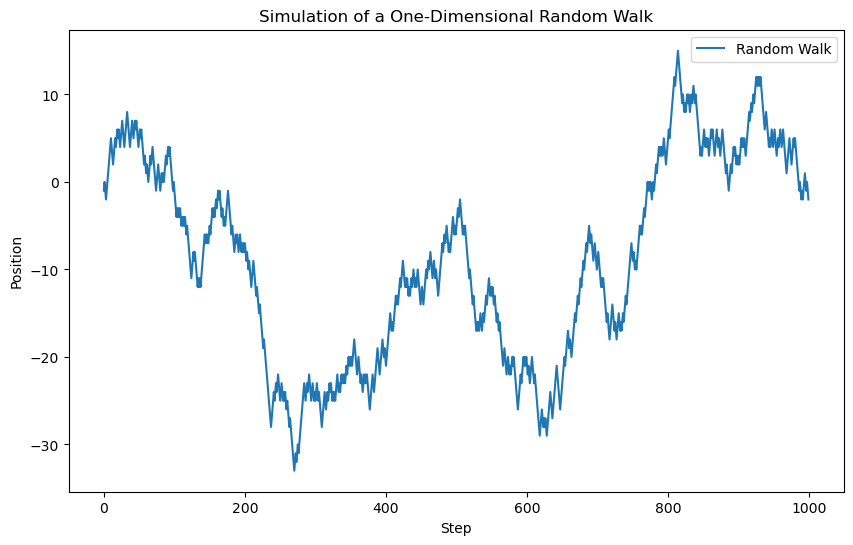

In [72]:
### Random Walk Example i

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_steps = 1000  # Number of steps

# Generate random steps (-1 or 1)
steps = np.random.choice([-1, 1], size=n_steps)

# Calculate the random walk
random_walk = np.cumsum(steps)

# Plot the random walk
plt.figure(figsize=(10, 6))
plt.plot(random_walk, label='Random Walk')
plt.title('Simulation of a One-Dimensional Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')
plt.legend()
plt.show()


##  Monte Carlo Simulation 

Monte Carlo Simulation is a powerful technique used in data science to model and analyze complex systems that involve uncertainty and variability. It relies on repeated random sampling to obtain numerical results and is used to understand the impact of risk and uncertainty in prediction and forecasting models. Monte Carlo methods are widely applicable in various fields, including finance, engineering, supply chain management, and more.

### Key Concepts of Monte Carlo Simulation

1. **Random Sampling**: The core of Monte Carlo simulation is generating random samples from a probability distribution to model uncertain parameters or inputs.
2. **Probability Distribution**: Defines the likelihood of different outcomes. Common distributions used in Monte Carlo simulations include normal, uniform, and exponential distributions.
3. **Simulation Runs**: Multiple iterations of the model, each using different sets of random inputs, to capture a range of possible outcomes.
4. **Convergence**: The process of running enough simulations to ensure that the results accurately reflect the underlying probability distributions and relationships.


### Steps in Conducting a Monte Carlo Simulation

1. **Define the Problem**: Clearly outline the system or process to be modeled, including the variables and outcomes of interest.
2. **Specify the Input Distributions**: Determine the probability distributions for the uncertain input variables.
3. **Generate Random Samples**: Use random sampling techniques to generate values for the input variables based on their specified distributions.
4. **Run Simulations**: Execute the model multiple times with different sets of random inputs to generate a range of outcomes.
5. **Analyze Results**: Aggregate and analyze the simulation results to estimate probabilities, identify trends, and make informed decisions.


### Applications of Monte Carlo Simulation 

#### 1. Financial Modeling

Monte Carlo simulation is widely used in finance to model the uncertainty and risk associated with financial instruments, portfolios, and investment strategies.

**Example**: Estimating the future value of a portfolio by simulating thousands of possible price paths for the assets.


**Formula for Simulated Price Paths**:

$ S_t = S_{t-1} \cdot \exp\left( \left(\mu - \frac{\sigma^2}{2}\right) \Delta_t + \sigma \sqrt{\Delta|_t} \cdot Z_t \right) $

where:
- $ S_t $ is the simulated price at time \( t \)
- $ S_{t-1} $ is the price at time \( t-1 \)
- $ \mu $ is the expected return
- $ \sigma $ is the volatility
- $ \Delta_t $ is the time step size
- $ Z_t $ is a random sample from a standard normal distribution




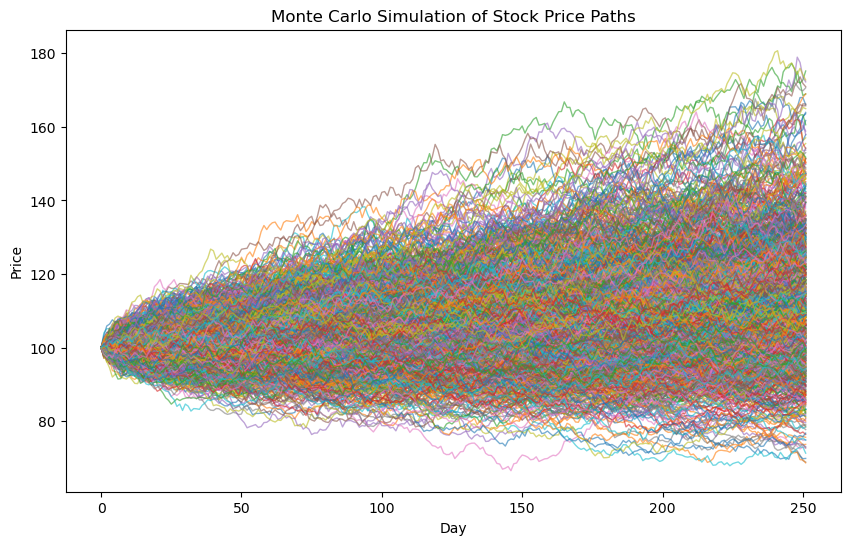

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_simulations = 1000
n_steps = 252  # Number of trading days in a year
initial_price = 100
mu = 0.0005  # Expected daily return
sigma = 0.01  # Daily volatility

# Simulate the price paths
price_paths = np.zeros((n_steps, n_simulations))
price_paths[0] = initial_price
for t in range(1, n_steps):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal(size=n_simulations))

# Plot the simulated price paths
plt.figure(figsize=(10, 6))
plt.plot(price_paths, lw=1, alpha=0.6)
plt.title('Monte Carlo Simulation of Stock Price Paths')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [79]:
# Risk Analysis and Management

#Calculating the Value at Risk (VaR) for a portfolio by simulating the distribution of possible losses.

import numpy as np

# Parameters
n_simulations = 10000
portfolio_value = 1000000
mean_return = 0.0002
volatility = 0.01
time_horizon = 1  # One day

# Simulate portfolio returns
simulated_returns = np.random.normal(mean_return, volatility, n_simulations)

# Calculate the portfolio values
portfolio_values = portfolio_value * (1 + simulated_returns)

# Calculate Value at Risk (VaR)
VaR_95 = np.percentile(portfolio_values, 5)
VaR_99 = np.percentile(portfolio_values, 1)

print(f'95% VaR: ${portfolio_value - VaR_95:.2f}')
print(f'99% VaR: ${portfolio_value - VaR_99:.2f}')


95% VaR: $16723.40
99% VaR: $24232.30


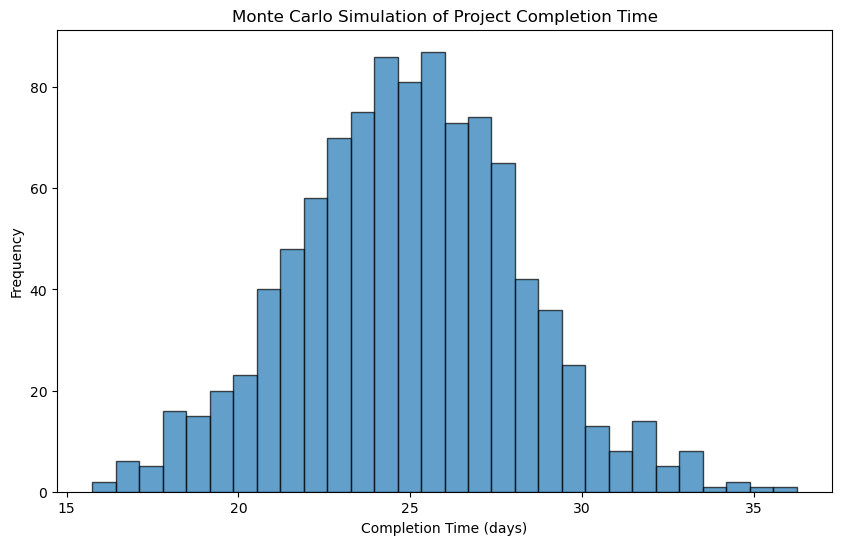

Expected Completion Time: 24.93 days
95% Confidence Interval: 18.39 - 31.66 days


In [80]:
#Project Management

# Estimating the completion time of a project by simulating different durations for each task.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_simulations = 1000
task_means = np.array([5, 7, 3, 4, 6])  # Mean durations of tasks in days
task_stds = np.array([1, 2, 1, 1, 2])   # Standard deviations of task durations

# Simulate project completion times
completion_times = np.zeros(n_simulations)
for i in range(n_simulations):
    task_durations = np.random.normal(task_means, task_stds)
    completion_times[i] = np.sum(task_durations)

# Plot the distribution of completion times
plt.figure(figsize=(10, 6))
plt.hist(completion_times, bins=30, edgecolor='k', alpha=0.7)
plt.title('Monte Carlo Simulation of Project Completion Time')
plt.xlabel('Completion Time (days)')
plt.ylabel('Frequency')
plt.show()

# Calculate the expected completion time and confidence intervals
mean_completion_time = np.mean(completion_times)
conf_interval_95 = np.percentile(completion_times, [2.5, 97.5])

print(f'Expected Completion Time: {mean_completion_time:.2f} days')
print(f'95% Confidence Interval: {conf_interval_95[0]:.2f} - {conf_interval_95[1]:.2f} days')


Monte Carlo simulation is a versatile tool in data science and machine learning. It can be used to improve models, validate results, and optimize hyperparameters by simulating a wide range of possible outcomes and analyzing the distributions of those outcomes. 

# Hyperparameter Optimization

Monte Carlo simulation can be used to explore the hyperparameter space more efficiently than grid search by randomly sampling combinations of hyperparameters and evaluating their performance.

#### Step-by-Step Implementation

1. **Define the Model and Hyperparameters**:
   - Choose a machine learning model and the hyperparameters to tune.

2. **Specify the Hyperparameter Distributions**:
   - Define the probability distributions for the hyperparameters.

3. **Generate Random Hyperparameter Samples**:
   - Use random sampling to generate different sets of hyperparameters.

4. **Evaluate the Model**:
   - Train and validate the model using the generated hyperparameters and record the performance metrics.

5. **Analyze Results**:
   - Identify the hyperparameter combinations that yield the best performance.



Best Accuracy: 1.00
Best Hyperparameters: n_estimators=167, max_depth=15


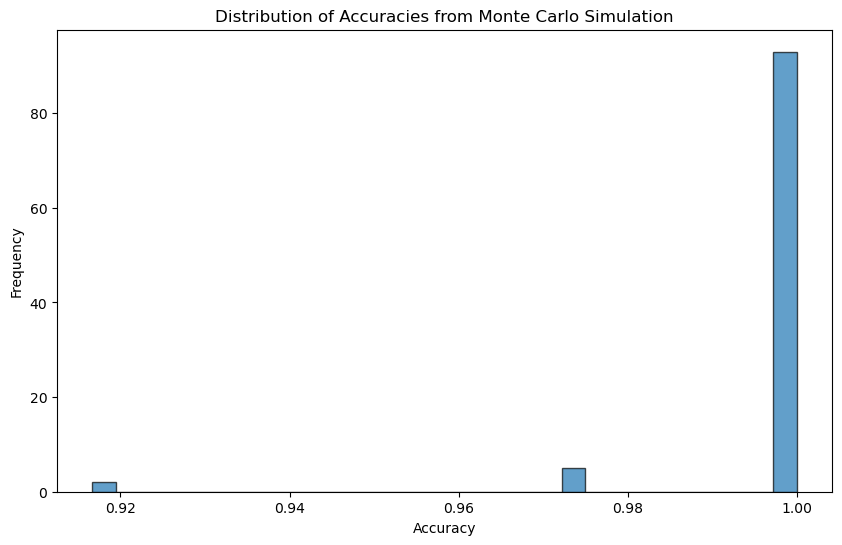

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter distributions
n_estimators_dist = np.random.randint(10, 200, 100)
max_depth_dist = np.random.randint(1, 20, 100)


# Monte Carlo simulation for hyperparameter tuning
n_simulations = 100
best_accuracy = 0
best_params = None
accuracies = []

for i in range(n_simulations):
    # Randomly select hyperparameters
    n_estimators = np.random.choice(n_estimators_dist)
    max_depth = np.random.choice(max_depth_dist)
    
    # Train and evaluate the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Update best hyperparameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = (n_estimators, max_depth)

print(f'Best Accuracy: {best_accuracy:.2f}')
print(f'Best Hyperparameters: n_estimators={best_params[0]}, max_depth={best_params[1]}')

# Plot the distribution of accuracies
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Accuracies from Monte Carlo Simulation')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


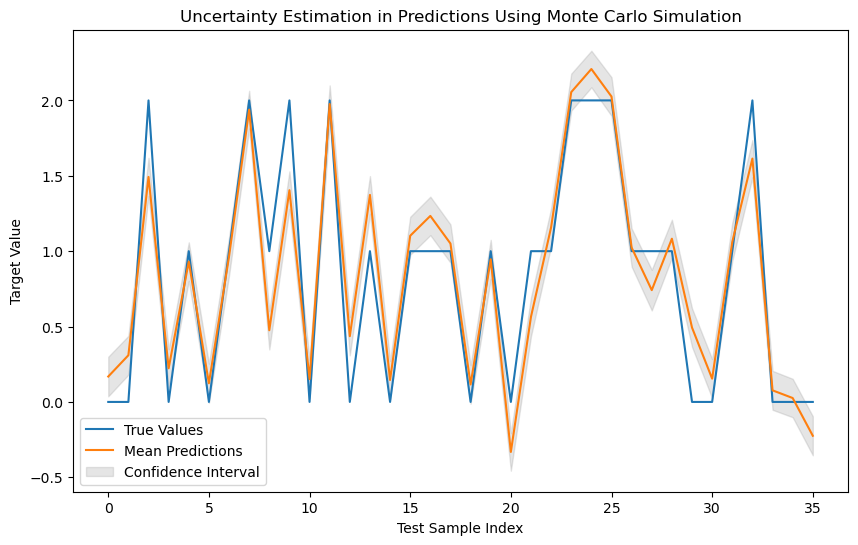

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Monte Carlo simulation for uncertainty estimation
n_simulations = 1000
predictions = np.zeros((n_simulations, len(X_test)))

for i in range(n_simulations):
    noise = np.random.normal(0, 0.1, X_test.shape)  # Add noise to inputs
    noisy_X_test = X_test + noise
    predictions[i] = model.predict(noisy_X_test)

# Calculate mean and standard deviation of predictions
mean_predictions = np.mean(predictions, axis=0)
std_predictions = np.std(predictions, axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(mean_predictions, label='Mean Predictions')
plt.fill_between(np.arange(len(y_test)), mean_predictions - 2 * std_predictions, mean_predictions + 2 * std_predictions, color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Uncertainty Estimation in Predictions Using Monte Carlo Simulation')
plt.xlabel('Test Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


In [ ]:
## Agent-Based Modeling


Agent-Based Modeling (ABM) is a simulation technique used to model the actions and interactions of autonomous agents with a view to assessing their effects on the system as a whole. It is particularly useful for studying complex systems with heterogeneous and interdependent components. ABM is widely used in fields such as economics, sociology, ecology, and many areas of data science.

### Key Concepts of Agent-Based Modeling

1. **Agents**: The basic units of ABM, representing individuals or entities with distinct behaviors and characteristics. Agents can be people, animals, organizations, or any other entities that interact within the modeled environment.
2. **Environment**: The space or context within which agents operate. This can be a physical space, a network, or any other setting relevant to the agents' interactions.
3. **Rules and Behaviors**: The set of rules that govern how agents interact with each other and the environment. These rules dictate agents' decisions, movements, and interactions.
4. **Emergence**: The phenomenon where complex system behaviors and patterns emerge from the simple interactions of agents. Emergence is a key focus of ABM, as it helps to understand how macro-level phenomena arise from micro-level actions.
5. **Adaptation**: Agents can adapt their behaviors based on interactions and experiences. This adaptive behavior is often modeled using techniques from artificial intelligence and machine learning.


### Steps in Agent-Based Modeling

1. **Define Objectives**: Clearly outline the goals and objectives of the ABM study, including the phenomena to be modeled and the questions to be answered.
2. **Design Agents**: Specify the characteristics, behaviors, and decision-making rules for each type of agent in the model.
3. **Construct the Environment**: Create the environment in which agents will operate, including any spatial, network, or contextual elements.
4. **Implement the Model**: Develop the simulation model using appropriate software tools and frameworks. Common tools for ABM include NetLogo, AnyLogic, and Python libraries like Mesa.
5. **Run Simulations**: Execute the model under various scenarios and parameter settings to observe the agents' behaviors and interactions.
6. **Analyze Results**: Analyze the simulation outputs to identify patterns, trends, and emergent phenomena. Validate the model by comparing the results with real-world data or theoretical predictions.
7. **Iterate and Refine**: Refine the model based on the analysis, incorporating new insights and making adjustments as necessary.



### Applications of Agent-Based Modeling in Data Science

1. **Epidemiology**: ABM is used to model the spread of infectious diseases, considering individual behaviors, social networks, and public health interventions. It helps in understanding the dynamics of disease transmission and evaluating strategies for controlling outbreaks.
   - **Example**: Simulating the spread of COVID-19 to evaluate the impact of social distancing measures and vaccination campaigns.

2. **Economics and Market Dynamics**: ABM models the behavior of consumers, firms, and financial markets to study economic phenomena such as market fluctuations, consumer behavior, and the impact of regulations.
   - **Example**: Modeling the stock market to understand how individual trading behaviors and strategies influence market volatility.

3. **Urban Planning and Traffic Simulation**: ABM is used to model the movement of individuals and vehicles in urban environments, helping to optimize traffic flow, public transportation, and urban development.
   - **Example**: Simulating traffic patterns to design better road networks and reduce congestion in cities.

4. **Ecology and Environmental Science**: ABM models the interactions between species, ecosystems, and environmental factors to study ecological dynamics, conservation strategies, and the impact of human activities on the environment.
   - **Example**: Modeling predator-prey dynamics to understand the effects of environmental changes on wildlife populations.

5. **Social Science and Behavioral Studies**: ABM is used to study social phenomena such as the spread of information, opinion dynamics, and collective behavior. It helps in understanding how individual actions and social networks influence group behaviors.
   - **Example**: Simulating the spread of opinions on social media to study the formation of public opinion and the impact of misinformation.


### Advantages and Challenges of Agent-Based Modeling

**Advantages**:
- **Flexibility**: ABM can model a wide range of complex systems with heterogeneous agents and interactions.
- **Granularity**: ABM provides detailed insights into the behaviors and interactions of individual agents.
- **Emergence**: ABM helps in understanding emergent phenomena that arise from the interactions of agents.

**Challenges**:
- **Computational Intensity**: ABM can be computationally intensive, especially for large-scale models with many agents and interactions.
- **Data Requirements**: ABM requires detailed data on agent behaviors, interactions, and environments, which can be difficult to obtain.
- **Model Validation**: Validating ABM models can be challenging due to the complexity and variability of the systems being modeled.


### Agent-Based Modeling for Virus Spread Simulation

Define Objectives:

- Simulate the spread of a virus within a population.
- Evaluate the impact of social distancing and vaccination on disease spread.

Design Agents:

- Each agent represents an individual with states: susceptible, infected, recovered, or vaccinated.

Construct the Environment:

- A simple grid where agents move and interact

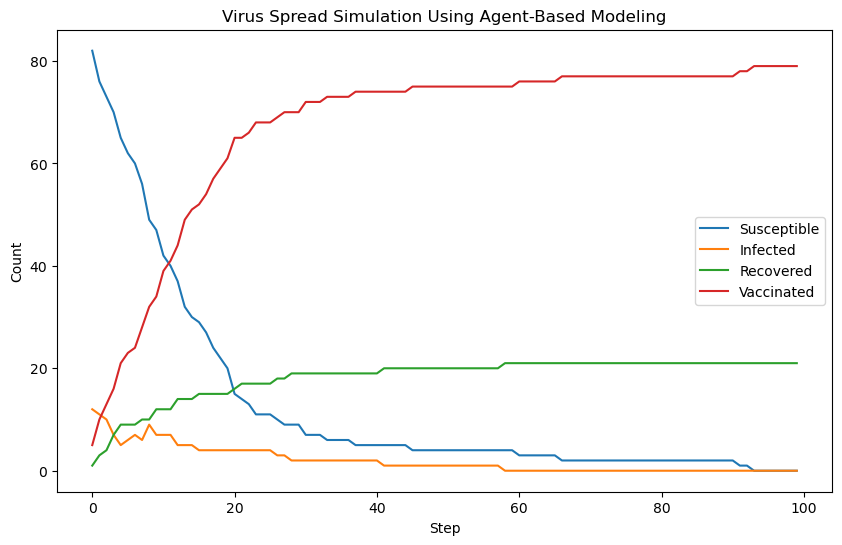

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
VACCINATED = 3

# Initialize parameters
num_agents = 100
grid_size = 10
infection_prob = 0.2
recovery_prob = 0.1
vaccination_prob = 0.05
num_steps = 100

# Create agents with initial states
agents = np.zeros((num_agents, 3), dtype=int)
agents[:, 0] = np.random.randint(0, grid_size, num_agents)  # X position
agents[:, 1] = np.random.randint(0, grid_size, num_agents)  # Y position
agents[:, 2] = np.random.choice([SUSCEPTIBLE, INFECTED], num_agents, p=[0.9, 0.1])  # Initial state

# Function to move agents
def move_agents(agents, grid_size):
    agents[:, 0] = (agents[:, 0] + np.random.randint(-1, 2, num_agents)) % grid_size
    agents[:, 1] = (agents[:, 1] + np.random.randint(-1, 2, num_agents)) % grid_size

# Function to update agents
def update_agents(agents, infection_prob, recovery_prob, vaccination_prob):
    for i in range(num_agents):
        if agents[i, 2] == INFECTED:
            if np.random.random() < recovery_prob:
                agents[i, 2] = RECOVERED
            else:
                for j in range(num_agents):
                    if agents[j, 2] == SUSCEPTIBLE and np.array_equal(agents[i, :2], agents[j, :2]):
                        if np.random.random() < infection_prob:
                            agents[j, 2] = INFECTED
        elif agents[i, 2] == SUSCEPTIBLE and np.random.random() < vaccination_prob:
            agents[i, 2] = VACCINATED

# Data collection
susceptible_counts = []
infected_counts = []
recovered_counts = []
vaccinated_counts = []

# Run simulation
for step in range(num_steps):
    move_agents(agents, grid_size)
    update_agents(agents, infection_prob, recovery_prob, vaccination_prob)
    
    susceptible_counts.append(np.sum(agents[:, 2] == SUSCEPTIBLE))
    infected_counts.append(np.sum(agents[:, 2] == INFECTED))
    recovered_counts.append(np.sum(agents[:, 2] == RECOVERED))
    vaccinated_counts.append(np.sum(agents[:, 2] == VACCINATED))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_counts, label='Susceptible')
plt.plot(infected_counts, label='Infected')
plt.plot(recovered_counts, label='Recovered')
plt.plot(vaccinated_counts, label='Vaccinated')
plt.xlabel('Step')
plt.ylabel('Count')
plt.title('Virus Spread Simulation Using Agent-Based Modeling')
plt.legend()
plt.show()
